<a href="https://colab.research.google.com/github/emh0841-code/Final-Team9/blob/main/%EC%8B%9C%EB%8C%80%EC%97%90_%EB%94%B0%EB%9D%BC_%ED%9D%A5%ED%96%89%ED%95%98%EB%8A%94_%EC%9E%A5%EB%A5%B4%EA%B0%80_%EB%8B%A4%EB%A5%BC%EA%B2%83%EC%9D%B4%EB%8B%A4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
#ÌïúÍ∏Ä Í∏ÄÏî® Ìè∞Ìä∏ ÏÑ§Ïπò
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

# ÌëúÏóêÏÑú ('-') ÎßàÏù¥ÎÑàÏä§ ÌëúÏãú
plt.rcParams['axes.unicode_minus'] = False

# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
import pandas as pd # Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ÎùºÏù¥Î∏åÎü¨Î¶¨
import numpy as np
import matplotlib.pyplot as plt # ÏãúÍ∞ÅÌôî ÎèÑÍµ¨ ÎùºÏù¥Î∏åÎü¨Î¶¨1
import seaborn as sns # ÏãúÍ∞ÅÌôî ÎèÑÍµ¨ ÎùºÏù¥Î∏åÎü¨Î¶¨2

In [75]:
df = pd.read_csv("/content/movies_genres_ohe.csv", on_bad_lines='skip')

[1980ÎÖÑÎåÄ Ïù¥ÌõÑ] Ìï≠Î™©Î≥Ñ Ïπ¥Ïö¥Ìä∏(Ìé∏Ïàò):
 Drama              6389.0
Comedy             5094.0
Thriller           3585.0
Action             3446.0
Romance            2517.0
Adventure          2292.0
Crime              2165.0
Horror             1663.0
Family             1439.0
Science Fiction    1376.0
Fantasy            1350.0
Mystery            1162.0
Animation           766.0
History             753.0
War                 466.0
Music               431.0
Documentary         158.0
Western             156.0
TV Movie             14.0
dtype: float64 

ÏãúÎåÄ √ó Ìï≠Î™©Î≥Ñ ÌèâÍ∑† y_result (1980ÎÖÑÎåÄ Ïù¥ÌõÑ):
          Action  Adventure  Animation    Comedy     Crime  Documentary  \
decade                                                                    
1980.0  1.134921   1.189474   1.043478  1.289216  1.080851     0.500000   
1990.0  1.081218   1.257618   1.116883  1.033916  1.004292     1.000000   
2000.0  1.007209   1.161094   1.309524  1.081633  0.966472     1.350000   
2010.0 

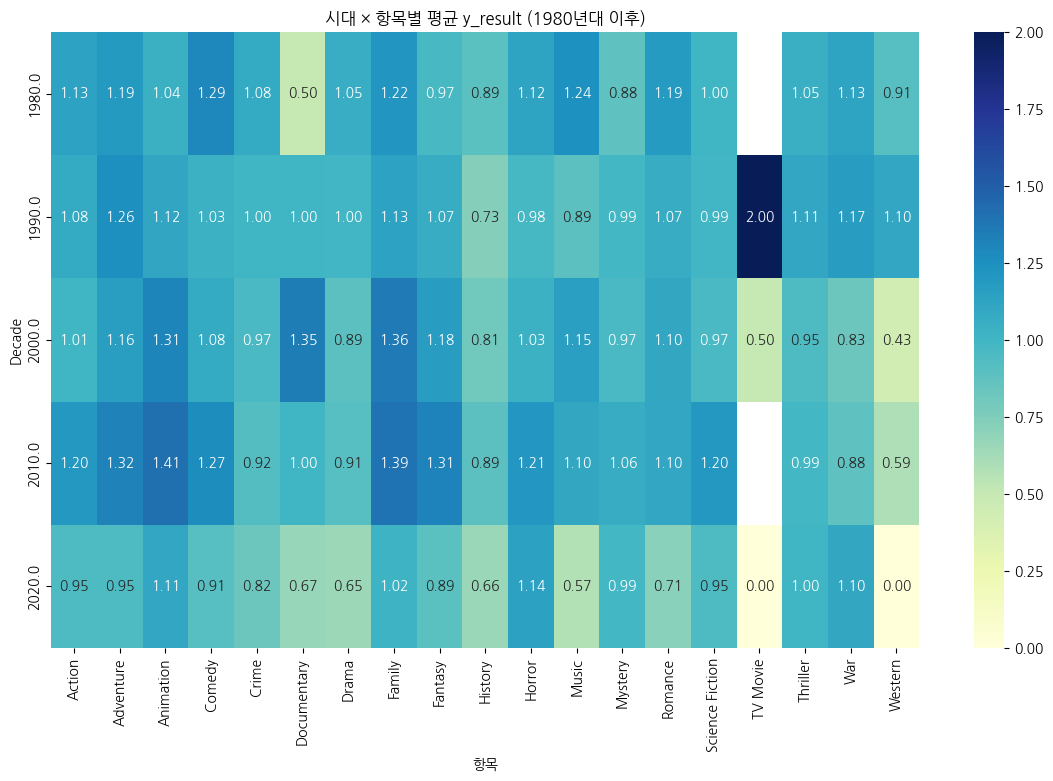

1980ÎÖÑÎåÄ Ïù¥ÌõÑ ÏÉÅÏúÑ 5Í∞ú Ìï≠Î™©: ['Family', 'Animation', 'Adventure', 'Comedy', 'Horror'] 



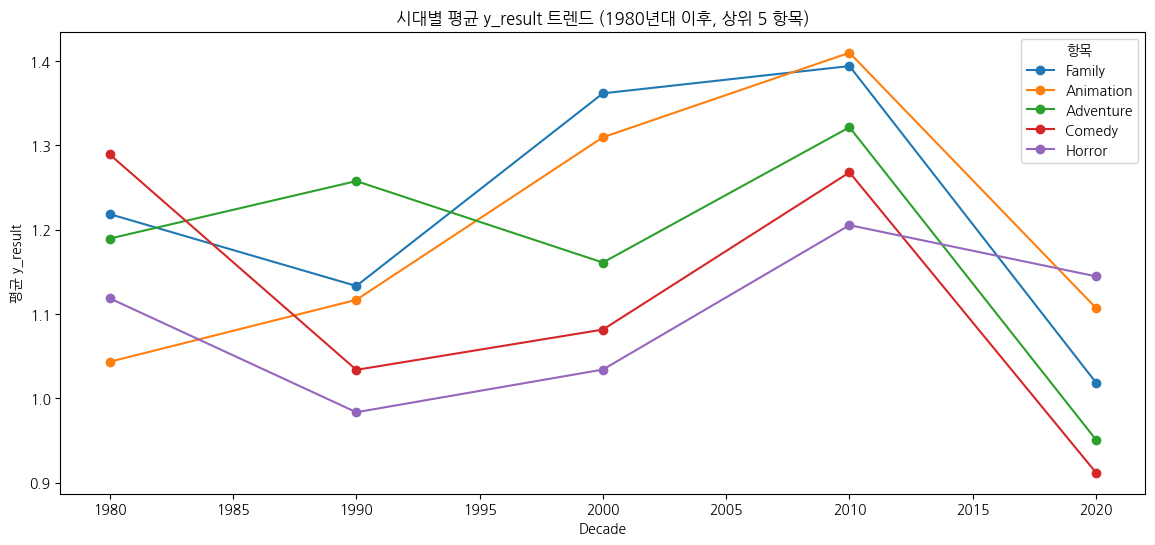

ÏãúÎåÄÎ≥Ñ ÏµúÍ≥† Ìù•Ìñâ Ìï≠Î™© Top3 (y_result Í∏∞Ï§Ä, 1980ÎÖÑÎåÄ Ïù¥ÌõÑ):
             Top1  Top1_val         Top2  Top2_val       Top3  Top3_val
decade                                                                 
1980.0     Comedy  1.289216        Music  1.244898     Family  1.218487
1990.0   TV Movie  2.000000    Adventure  1.257618        War  1.170732
2000.0     Family  1.361607  Documentary  1.350000  Animation  1.309524
2010.0  Animation  1.409742       Family  1.393939  Adventure  1.321429
2020.0     Horror  1.144737    Animation  1.107143        War  1.100000 

[Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï: Shapiro-Wilk] (1980ÎÖÑÎåÄ Ïù¥ÌõÑ, Top5 Ìï≠Î™©)
Family          ‚Üí W=0.8584, p=4.1465e-34, n=1439
Animation       ‚Üí W=0.8378, p=3.2800e-27, n=766
Adventure       ‚Üí W=0.8422, p=5.7229e-43, n=2292
Comedy          ‚Üí W=0.8516, p=1.9270e-56, n=5094
Horror          ‚Üí W=0.8459, p=1.9072e-37, n=1663

[ANOVA Í≤∞Í≥º] (1980ÎÖÑÎåÄ Ïù¥ÌõÑ, Top5)
F = 10.4377, p = 1.9459e-08

[Kruskal-Wallis Í≤∞Í≥º] (1980

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5094.
  res = hypotest_fun_out(*samples, **kwds)


In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, f_oneway, kruskal


df.columns = df.columns.str.strip()

# ÎÇ†Ïßú ‚Üí year ‚Üí decade
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["year"] = df["release_date"].dt.year
df["decade"] = (df["year"] // 10) * 10

#  1980ÎÖÑÎåÄ Ïù¥ÌõÑÎßå ÏÇ¨Ïö©
df = df[df["decade"] >= 1980].copy()

# Ïû•Î•¥(Ìï≠Î™©) 0/1 Ïª¨Îüº ÏûêÎèô ÏÑ†ÌÉù (Action ~ Western Íµ¨Í∞Ñ)
cols = df.loc[:, "Action":"Western"].columns.tolist()


# 1) Í∞ÑÎã® Ï≤¥ÌÅ¨: Ìï≠Î™©Î≥Ñ Ï†ÑÏ≤¥ Ïπ¥Ïö¥Ìä∏
col_counts = df[cols].sum().sort_values(ascending=False)
print("[1980ÎÖÑÎåÄ Ïù¥ÌõÑ] Ìï≠Î™©Î≥Ñ Ïπ¥Ïö¥Ìä∏(Ìé∏Ïàò):\n", col_counts, "\n")


# ÏãúÎåÄ √ó Ìï≠Î™©Î≥Ñ ÌèâÍ∑† y_result

decade_genre = {}
for c in cols:
    decade_genre[c] = df.loc[df[c] == 1].groupby("decade")["y_result"].mean()

decade_genre = pd.DataFrame(decade_genre).sort_index()
print("ÏãúÎåÄ √ó Ìï≠Î™©Î≥Ñ ÌèâÍ∑† y_result (1980ÎÖÑÎåÄ Ïù¥ÌõÑ):")
print(decade_genre, "\n")

plt.figure(figsize=(14,8))
sns.heatmap(decade_genre, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("ÏãúÎåÄ √ó Ìï≠Î™©Î≥Ñ ÌèâÍ∑† y_result (1980ÎÖÑÎåÄ Ïù¥ÌõÑ)")
plt.xlabel("Ìï≠Î™©")
plt.ylabel("Decade")
plt.show()

# 3) Ï†ÑÏ≤¥ Í∏∞Í∞Ñ(1980+) ÌèâÍ∑† Í∏∞Ï§Ä ÏÉÅÏúÑ 5Í∞ú Ìï≠Î™© Ï∂îÏ∂ú
topN = 5
top_cols = decade_genre.mean().sort_values(ascending=False).head(topN).index.tolist()
print(f"1980ÎÖÑÎåÄ Ïù¥ÌõÑ ÏÉÅÏúÑ {topN}Í∞ú Ìï≠Î™©:", top_cols, "\n")

# ÎùºÏù∏ Í∑∏ÎûòÌîÑ (Top5 Ìä∏Î†åÎìú)
decade_genre[top_cols].plot(marker="o", figsize=(14,6))
plt.title(f"ÏãúÎåÄÎ≥Ñ ÌèâÍ∑† y_result Ìä∏Î†åÎìú (1980ÎÖÑÎåÄ Ïù¥ÌõÑ, ÏÉÅÏúÑ {topN} Ìï≠Î™©)")
plt.xlabel("Decade")
plt.ylabel("ÌèâÍ∑† y_result")
plt.legend(title="Ìï≠Î™©")
plt.show()


#  ÏãúÎåÄÎ≥Ñ Top3

def top3(row):
    s = row.dropna().sort_values(ascending=False).head(3)
    out = {}
    for i in range(3):
        if i < len(s):
            out[f"Top{i+1}"] = s.index[i]
            out[f"Top{i+1}_val"] = float(s.iloc[i])
        else:
            out[f"Top{i+1}"] = None
            out[f"Top{i+1}_val"] = None
    return pd.Series(out)

top3_table = decade_genre.apply(top3, axis=1)
print("ÏãúÎåÄÎ≥Ñ ÏµúÍ≥† Ìù•Ìñâ Ìï≠Î™© Top3 (y_result Í∏∞Ï§Ä, 1980ÎÖÑÎåÄ Ïù¥ÌõÑ):")
print(top3_table, "\n")

#  ÏÉÅÏúÑ 5Í∞ú Ìï≠Î™©: Ï†ïÍ∑úÏÑ± ‚Üí ANOVA ‚Üí Kruskal

print("[Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï: Shapiro-Wilk] (1980ÎÖÑÎåÄ Ïù¥ÌõÑ, Top5 Ìï≠Î™©)")
for c in top_cols:
    vals = df.loc[df[c] == 1, "y_result"].dropna()
    if len(vals) >= 8:
        stat, p = shapiro(vals)
        print(f"{c:15s} ‚Üí W={stat:.4f}, p={p:.4e}, n={len(vals)}")
    else:
        print(f"{c:15s} ‚Üí ÏÉòÌîå Î∂ÄÏ°± (n={len(vals)})")
print()

# ANOVA
groups = [df.loc[df[c] == 1, "y_result"].dropna() for c in top_cols]
if all(len(g) >= 2 for g in groups):
    f_stat, p_val = f_oneway(*groups)
    print(f"[ANOVA Í≤∞Í≥º] (1980ÎÖÑÎåÄ Ïù¥ÌõÑ, Top5)\nF = {f_stat:.4f}, p = {p_val:.4e}\n")
else:
    print("[ANOVA] ÌëúÎ≥∏ Î∂ÄÏ°±ÏúºÎ°ú Í±¥ÎÑàÎúÄ\n")

# Kruskal-Wallis
if all(len(g) >= 2 for g in groups):
    h_stat, p_val = kruskal(*groups)
    print(f"[Kruskal-Wallis Í≤∞Í≥º] (1980ÎÖÑÎåÄ Ïù¥ÌõÑ, Top5)\nH = {h_stat:.4f}, p = {p_val:.4e}\n")
else:
    print("[Kruskal-Wallis] ÌëúÎ≥∏ Î∂ÄÏ°±ÏúºÎ°ú Í±¥ÎÑàÎúÄ\n")



2020ÎÖÑÎåÄ Top5 Ïû•Î•¥: ['Horror', 'Animation', 'War', 'Family', 'Thriller']

2020ÎÖÑÎåÄ Top5 Ïû•Î•¥Ïùò ÏãúÎåÄÎ≥Ñ ÌèâÍ∑† y_result ÌùêÎ¶Ñ:
          Horror  Animation       War    Family  Thriller
decade                                                   
1980.0  1.118705   1.043478  1.132353  1.218487  1.050445
1990.0  0.983673   1.116883  1.170732  1.133333  1.109177
2000.0  1.034261   1.309524  0.827815  1.361607  0.951111
2010.0  1.205374   1.409742  0.881720  1.393939  0.989633
2020.0  1.144737   1.107143  1.100000  1.018692  1.000000


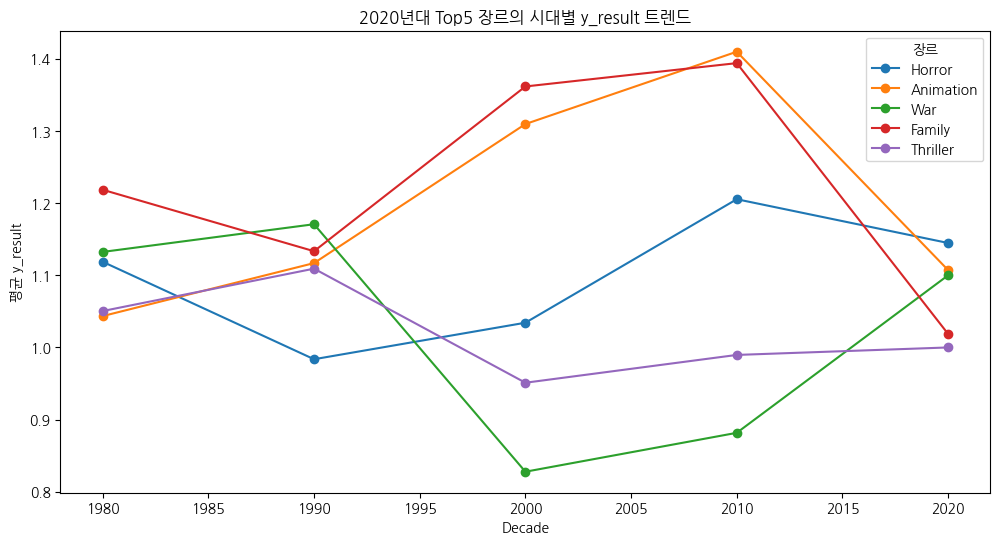

In [77]:
#  2020ÎÖÑÎåÄÎßå ÌïÑÌÑ∞
df_2020 = df[df["decade"] == 2020].copy()
cols = df.loc[:, "Action":"Western"].columns.tolist()

#  2020ÎÖÑÎåÄ Ïû•Î•¥Î≥Ñ ÌèâÍ∑† y_result Í≥ÑÏÇ∞
genre_mean_2020 = {c: df_2020.loc[df_2020[c]==1, "y_result"].mean() for c in cols}
genre_mean_2020 = pd.Series(genre_mean_2020).dropna().sort_values(ascending=False)

#  Top5 Ïû•Î•¥ Ï∂îÏ∂ú
topN = 5
top_cols_2020 = genre_mean_2020.head(topN).index.tolist()
print("2020ÎÖÑÎåÄ Top5 Ïû•Î•¥:", top_cols_2020)

# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞(1980ÎÖÑÎåÄ Ïù¥ÌõÑ)ÏóêÏÑú Ïù¥ Ïû•Î•¥Îì§Ïùò ÏãúÎåÄÎ≥Ñ ÌèâÍ∑† ÌùêÎ¶Ñ Í≥ÑÏÇ∞
decade_trend = {}
for c in top_cols_2020:
    decade_trend[c] = df.loc[df[c]==1].groupby("decade")["y_result"].mean()

decade_trend = pd.DataFrame(decade_trend).sort_index()

print("\n2020ÎÖÑÎåÄ Top5 Ïû•Î•¥Ïùò ÏãúÎåÄÎ≥Ñ ÌèâÍ∑† y_result ÌùêÎ¶Ñ:")
print(decade_trend)

#  ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt

decade_trend.plot(marker="o", figsize=(12,6))
plt.title("2020ÎÖÑÎåÄ Top5 Ïû•Î•¥Ïùò ÏãúÎåÄÎ≥Ñ y_result Ìä∏Î†åÎìú")
plt.xlabel("Decade")
plt.ylabel("ÌèâÍ∑† y_result")
plt.legend(title="Ïû•Î•¥")
plt.show()


üìå 2020ÎÖÑÎåÄ Ïû•Î•¥Î≥Ñ ÌèâÍ∑† y_result ÏàúÏúÑ:
Horror             1.144737
Animation          1.107143
War                1.100000
Family             1.018692
Thriller           1.000000
Mystery            0.989247
Action             0.953069
Adventure          0.950980
Science Fiction    0.945946
Comedy             0.912000
Fantasy            0.892086
Crime              0.822430
Romance            0.714286
Documentary        0.666667
History            0.657895
Drama              0.653968
Music              0.571429
TV Movie           0.000000
Western            0.000000
dtype: float64


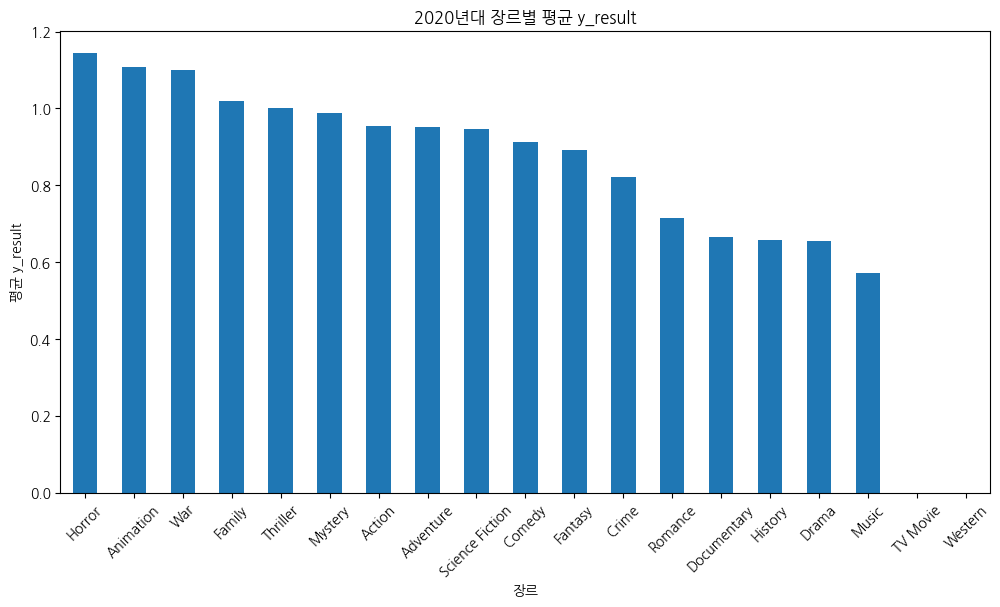

In [78]:
# 2020ÎÖÑÎåÄ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞
df_2020 = df[df["decade"] == 2020].copy()

# Ïû•Î•¥ Ïª¨Îüº ÏûêÎèô Ï∂îÏ∂ú
cols = df.loc[:, "Action":"Western"].columns.tolist()

# 2020ÎÖÑÎåÄ Ïû•Î•¥Î≥Ñ ÌèâÍ∑† y_result
genre_mean_2020 = {
    c: df_2020.loc[df_2020[c] == 1, "y_result"].mean()
    for c in cols
}
genre_mean_2020 = pd.Series(genre_mean_2020).dropna().sort_values(ascending=False)

# Ï∂úÎ†•
print("üìå 2020ÎÖÑÎåÄ Ïû•Î•¥Î≥Ñ ÌèâÍ∑† y_result ÏàúÏúÑ:")
print(genre_mean_2020)

# ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt
genre_mean_2020.plot(kind="bar", figsize=(12,6))
plt.title("2020ÎÖÑÎåÄ Ïû•Î•¥Î≥Ñ ÌèâÍ∑† y_result")
plt.xlabel("Ïû•Î•¥")
plt.ylabel("ÌèâÍ∑† y_result")
plt.xticks(rotation=45)
plt.show()



Ï†ÑÏ≤¥ Ïû•Î•¥Ïùò ÏãúÎåÄÎ≥Ñ ÌèâÍ∑† y_result ÌùêÎ¶Ñ:
          Action  Adventure  Animation    Comedy     Crime  Documentary  \
decade                                                                    
1980.0  1.134921   1.189474   1.043478  1.289216  1.080851     0.500000   
1990.0  1.081218   1.257618   1.116883  1.033916  1.004292     1.000000   
2000.0  1.007209   1.161094   1.309524  1.081633  0.966472     1.350000   
2010.0  1.200163   1.321429   1.409742  1.267966  0.922504     1.000000   
2020.0  0.953069   0.950980   1.107143  0.912000  0.822430     0.666667   

           Drama    Family   Fantasy   History    Horror     Music   Mystery  \
decade                                                                         
1980.0  1.054867  1.218487  0.975000  0.892308  1.118705  1.244898  0.875000   
1990.0  0.995532  1.133333  1.069869  0.728261  0.983673  0.888889  0.985714   
2000.0  0.888249  1.361607  1.175393  0.805000  1.034261  1.149660  0.967822   
2010.0  0.908460  1.39

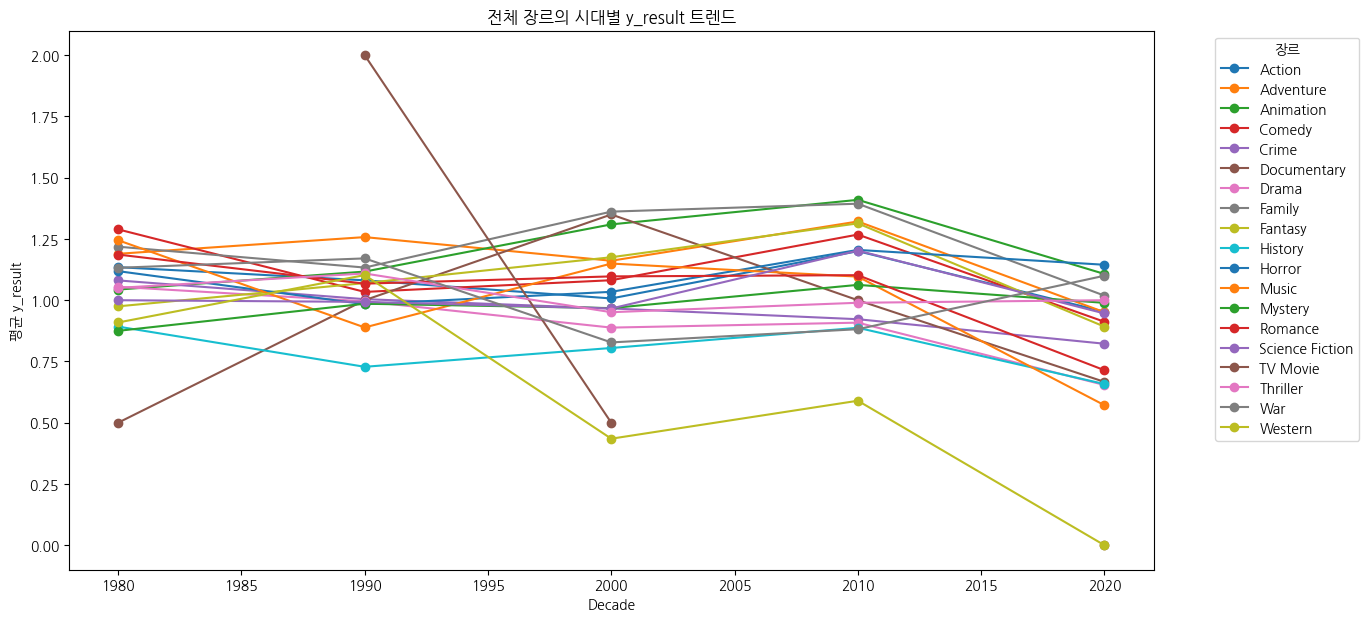

In [79]:
# Ï†ÑÏ≤¥ Ïû•Î•¥Î≥Ñ ÏãúÎåÄÎ≥Ñ ÌèâÍ∑† y_result Í≥ÑÏÇ∞
decade_trend_all = {}
for c in cols:
    decade_trend_all[c] = df.loc[df[c] == 1].groupby("decade")["y_result"].mean()

decade_trend_all = pd.DataFrame(decade_trend_all).sort_index()

print("\nÏ†ÑÏ≤¥ Ïû•Î•¥Ïùò ÏãúÎåÄÎ≥Ñ ÌèâÍ∑† y_result ÌùêÎ¶Ñ:")
print(decade_trend_all)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14,7))
for c in decade_trend_all.columns:
    plt.plot(decade_trend_all.index, decade_trend_all[c], marker="o", label=c)

plt.title("Ï†ÑÏ≤¥ Ïû•Î•¥Ïùò ÏãúÎåÄÎ≥Ñ y_result Ìä∏Î†åÎìú")
plt.xlabel("Decade")
plt.ylabel("ÌèâÍ∑† y_result")
plt.legend(title="Ïû•Î•¥", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()



Ï†ÑÏ≤¥ Ïû•Î•¥Ïùò 5ÎÖÑ Îã®ÏúÑ ÌèâÍ∑† y_result ÌùêÎ¶Ñ:
            Action  Adventure  Animation    Comedy     Crime  Documentary  \
year_bin                                                                    
1980      1.369128   1.403509   1.142857  1.385366  1.109756     0.666667   
1985      0.982533   1.046784   1.000000  1.240786  1.065359     0.000000   
1990      1.097378   1.205128   0.678571  1.022727  0.967742     2.000000   
1995      1.067901   1.297561   1.367347  1.041594  1.036145     0.500000   
2000      1.000000   1.239852   1.232558  1.116246  0.954693     1.466667   
2005      1.013645   1.105943   1.362903  1.054264  0.976127     1.280000   
2010      1.139837   1.269122   1.323529  1.244318  0.924581     1.105263   
2015      1.260586   1.364269   1.491620  1.295276  0.920128     0.714286   
2020      0.953069   0.950980   1.107143  0.912000  0.822430     0.666667   

             Drama    Family   Fantasy   History    Horror     Music  \
year_bin                  

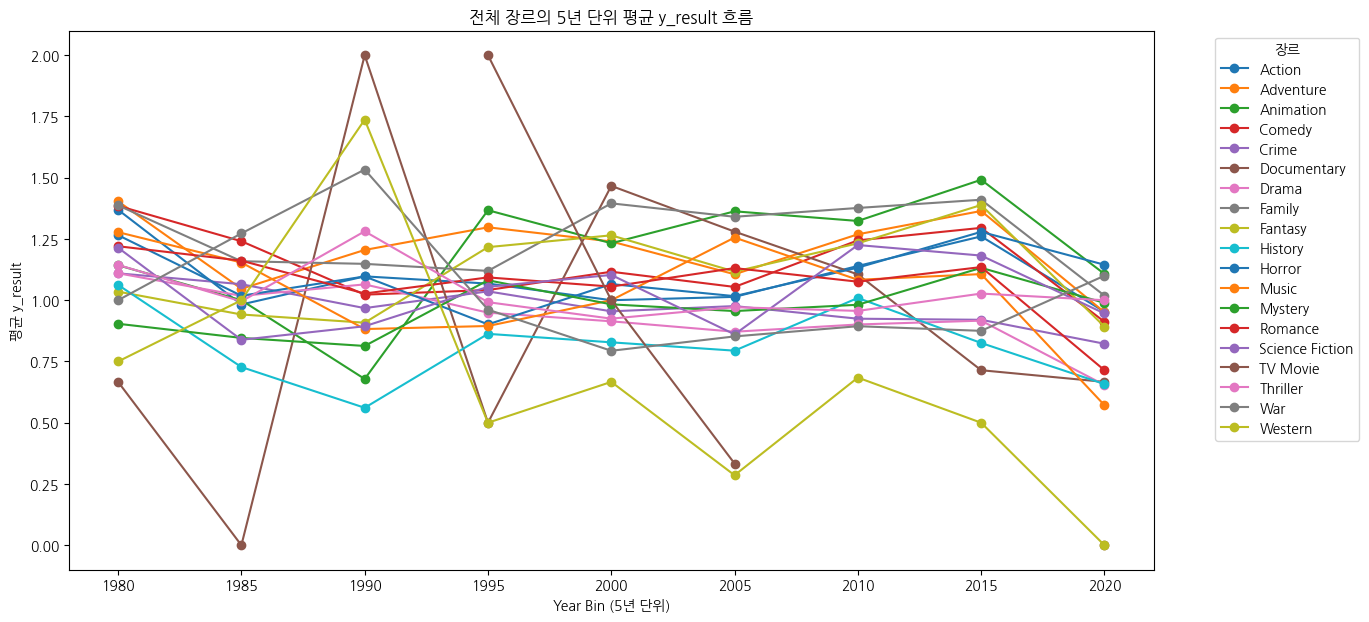

In [80]:
# 1) Ïó∞ÎèÑ Ï∂îÏ∂ú
df["release_year"] = pd.to_datetime(df["release_date"], errors="coerce").dt.year

# 2) 5ÎÖÑ Ï£ºÍ∏∞ Í∑∏Î£π ÏÉùÏÑ±
df["year_bin"] = (df["release_year"] // 5) * 5
# 3) Ï†ÑÏ≤¥ Ïû•Î•¥Î≥Ñ 5ÎÖÑ Ï£ºÍ∏∞ ÌèâÍ∑† y_result Í≥ÑÏÇ∞
trend_5y = {}
for c in cols:
    trend_5y[c] = df.loc[df[c] == 1].groupby("year_bin")["y_result"].mean()

trend_5y = pd.DataFrame(trend_5y).sort_index()

print("\nÏ†ÑÏ≤¥ Ïû•Î•¥Ïùò 5ÎÖÑ Îã®ÏúÑ ÌèâÍ∑† y_result ÌùêÎ¶Ñ:")
print(trend_5y)

# 4) ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14,7))
for c in trend_5y.columns:
    plt.plot(trend_5y.index, trend_5y[c], marker="o", label=c)

plt.title("Ï†ÑÏ≤¥ Ïû•Î•¥Ïùò 5ÎÖÑ Îã®ÏúÑ ÌèâÍ∑† y_result ÌùêÎ¶Ñ")  # ‚Üê ÌÉÄÏù¥ÌãÄ ÏàòÏ†ï
plt.xlabel("Year Bin (5ÎÖÑ Îã®ÏúÑ)")
plt.ylabel("ÌèâÍ∑† y_result")
plt.legend(title="Ïû•Î•¥", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


2020~2025ÎÖÑ Top5 Ïû•Î•¥: ['Horror', 'Animation', 'War', 'Family', 'Thriller']

ÏÉÅÏúÑ 5Í∞ú Ïû•Î•¥Ïùò 5ÎÖÑ Îã®ÏúÑ ÌèâÍ∑† y_result ÌùêÎ¶Ñ (2025ÎÖÑÍπåÏßÄ):
            Horror  Animation       War    Family  Thriller
year_bin                                                   
1980      1.265487   1.142857  1.000000  1.387097  1.144000
1985      1.018182   1.000000  1.272727  1.159091  0.995283
1990      1.097087   0.678571  1.533333  1.148438  1.281250
1995      0.901408   1.367347  0.961538  1.119718  0.992021
2000      1.065868   1.232558  0.793651  1.395349  0.924797
2005      1.016667   1.362903  0.852273  1.340580  0.971564
2010      1.133080   1.323529  0.893939  1.376569  0.956391
2015      1.279070   1.491620  0.875000  1.410156  1.027165
2020      1.144737   1.107143  1.100000  1.018692  1.000000


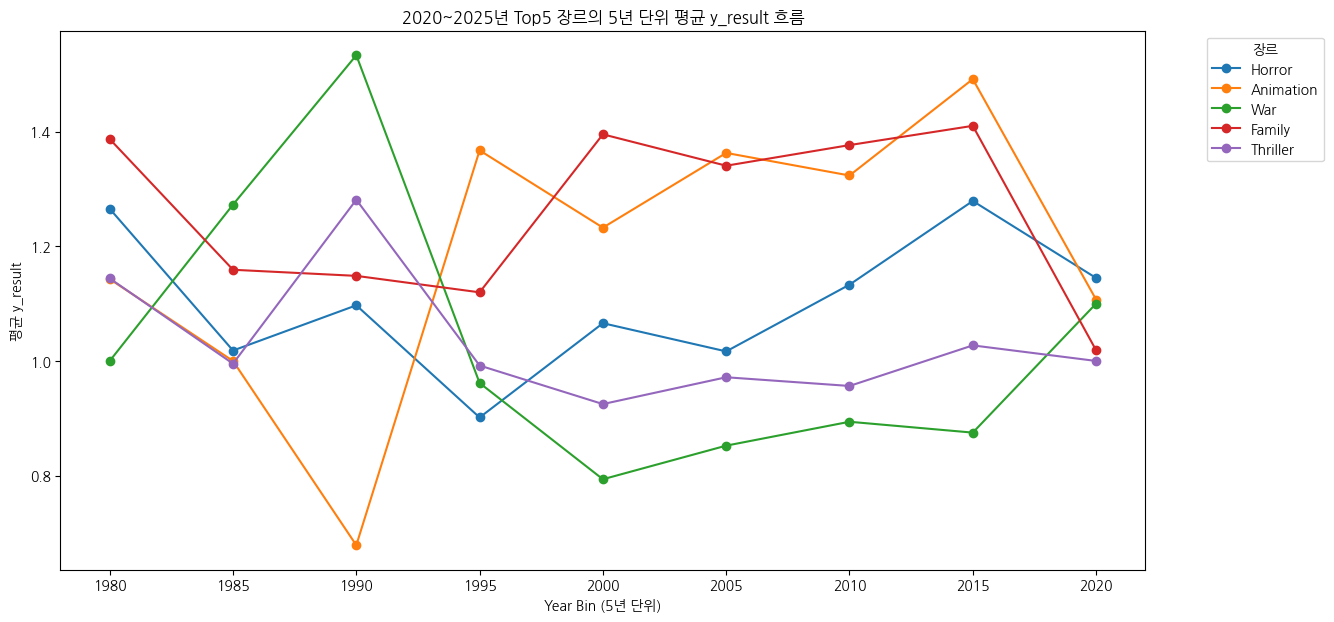

In [81]:
# 1) Ïó∞ÎèÑ Ï∂îÏ∂ú
df["release_year"] = pd.to_datetime(df["release_date"], errors="coerce").dt.year

# 2) 5ÎÖÑ Îã®ÏúÑ Í∑∏Î£π (ÎßàÏßÄÎßâ Íµ¨Í∞ÑÏùÄ 2025Î°ú ÌëúÏãú)
df["year_bin"] = (df["release_year"] // 5) * 5
df.loc[df["release_year"] >= 2025, "year_bin"] = 2025   # 2025ÎÖÑ Ìè¨Ìï®

# 3) 2020ÎÖÑÎåÄ Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞
df_2020 = df[df["year_bin"] >= 2020].copy()

# 4) 2020ÎÖÑÎåÄ Ïû•Î•¥Î≥Ñ ÌèâÍ∑† y_result Í≥ÑÏÇ∞
genre_mean_2020 = {c: df_2020.loc[df_2020[c]==1, "y_result"].mean() for c in cols}
genre_mean_2020 = pd.Series(genre_mean_2020).dropna().sort_values(ascending=False)

# 5) Top5 Ïû•Î•¥ Ï∂îÏ∂ú
topN = 5
top_cols_2020 = genre_mean_2020.head(topN).index.tolist()
print("2020~2025ÎÖÑ Top5 Ïû•Î•¥:", top_cols_2020)

# 6) ÏÉÅÏúÑ 5Í∞ú Ïû•Î•¥Ïùò 5ÎÖÑ Îã®ÏúÑ ÌèâÍ∑† y_result ÌùêÎ¶Ñ
trend_top5 = {}
for c in top_cols_2020:
    trend_top5[c] = df.loc[df[c] == 1].groupby("year_bin")["y_result"].mean()

trend_top5 = pd.DataFrame(trend_top5).sort_index()

print("\nÏÉÅÏúÑ 5Í∞ú Ïû•Î•¥Ïùò 5ÎÖÑ Îã®ÏúÑ ÌèâÍ∑† y_result ÌùêÎ¶Ñ (2025ÎÖÑÍπåÏßÄ):")
print(trend_top5)

# 7) ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14,7))
for c in trend_top5.columns:
    plt.plot(trend_top5.index, trend_top5[c], marker="o", label=c)

plt.title("2020~2025ÎÖÑ Top5 Ïû•Î•¥Ïùò 5ÎÖÑ Îã®ÏúÑ ÌèâÍ∑† y_result ÌùêÎ¶Ñ")
plt.xlabel("Year Bin (5ÎÖÑ Îã®ÏúÑ)")
plt.ylabel("ÌèâÍ∑† y_result")
plt.legend(title="Ïû•Î•¥", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


2020 Í∏∞Ï§Ä Top5 Ïû•Î•¥: ['Horror', 'Animation', 'War', 'Family', 'Thriller']


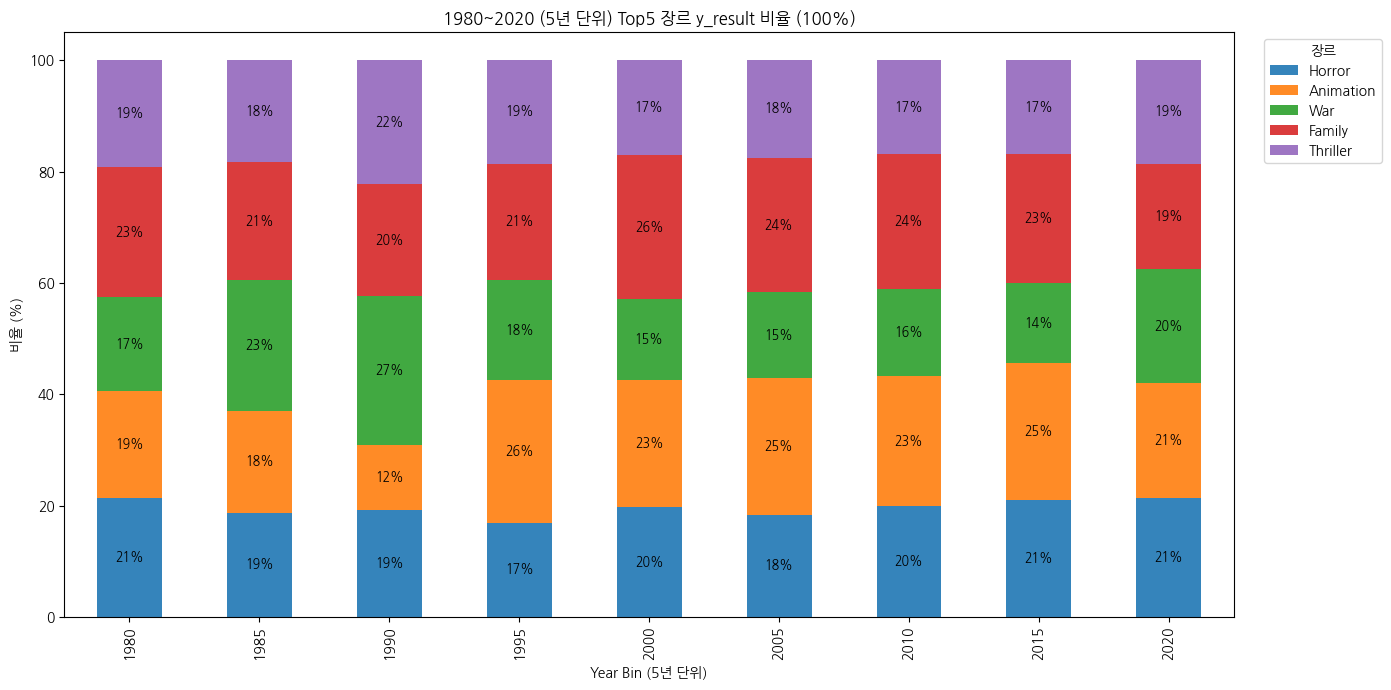

In [88]:
df["release_year"] = pd.to_datetime(df["release_date"], errors="coerce").dt.year
df["year_bin"] = (df["release_year"] // 5) * 5
df = df[df["year_bin"] >= 1980].copy()
df.loc[df["release_year"] >= 2025, "year_bin"] = 2025  # ÏµúÏã† Íµ¨Í∞Ñ Ìè¨Ìï®

latest_bin = df["year_bin"].max()
df_latest = df[df["year_bin"] == latest_bin]
genre_mean_latest = {c: df_latest.loc[df_latest[c]==1, "y_result"].mean() for c in cols}
top5 = pd.Series(genre_mean_latest).dropna().sort_values(ascending=False).head(5).index.tolist()
print(f"{latest_bin} Í∏∞Ï§Ä Top5 Ïû•Î•¥:", top5)


trend_top5 = {c: df.loc[df[c]==1].groupby("year_bin")["y_result"].mean() for c in top5}
trend_top5 = pd.DataFrame(trend_top5).sort_index()
trend_top5_pct = trend_top5.div(trend_top5.sum(axis=1).replace(0, np.nan), axis=0) * 100


ax = trend_top5_pct.plot(kind="bar", stacked=True, figsize=(14,7), alpha=0.9)
ax.set_title(f"1980~{latest_bin} (5ÎÖÑ Îã®ÏúÑ) Top5 Ïû•Î•¥ y_result ÎπÑÏú® (100%)")
ax.set_xlabel("Year Bin (5ÎÖÑ Îã®ÏúÑ)")
ax.set_ylabel("ÎπÑÏú® (%)")
ax.legend(title="Ïû•Î•¥", bbox_to_anchor=(1.02, 1), loc="upper left")

for container in ax.containers:
    labels = [f"{h.get_height():.0f}%" if h.get_height() >= 8 else "" for h in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=9)

plt.tight_layout()
plt.show()



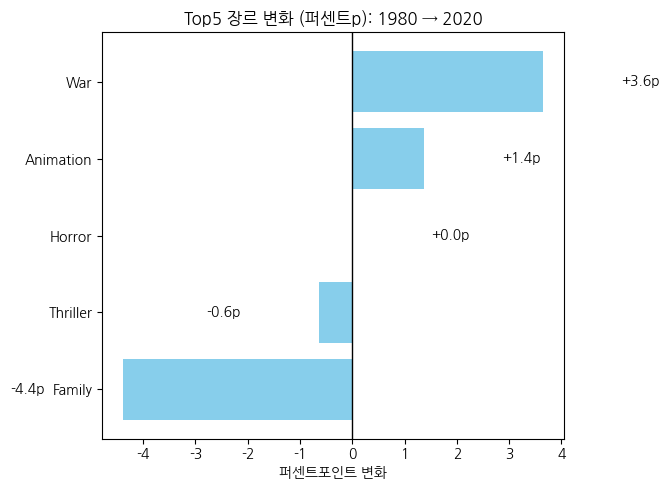

In [89]:

first_bin = trend_top5_pct.index.min()
latest_bin = trend_top5_pct.index.max()

# Î≥ÄÌôîÎüâ Í≥ÑÏÇ∞
change_pp = (trend_top5_pct.loc[latest_bin] - trend_top5_pct.loc[first_bin]).sort_values()

# ÏàòÌèâ ÎßâÎåÄÍ∑∏ÎûòÌîÑ
plt.figure(figsize=(7,5))
plt.barh(change_pp.index, change_pp.values, color="skyblue")
plt.axvline(0, color="black", linewidth=1)
plt.title(f"Top5 Ïû•Î•¥ Î≥ÄÌôî (ÌçºÏÑºÌä∏p): {first_bin} ‚Üí {latest_bin}")
plt.xlabel("ÌçºÏÑºÌä∏Ìè¨Ïù∏Ìä∏ Î≥ÄÌôî")

# ÎßâÎåÄ ÏòÜÏóê Î≥ÄÌôîÎüâ ÌëúÏãú
for i, v in enumerate(change_pp.values):
    plt.text(v + (1.5 if v>=0 else -1.5), i, f"{v:+.1f}p",
             va='center', ha='left' if v>=0 else 'right', fontsize=10)

plt.tight_layout()
plt.show()


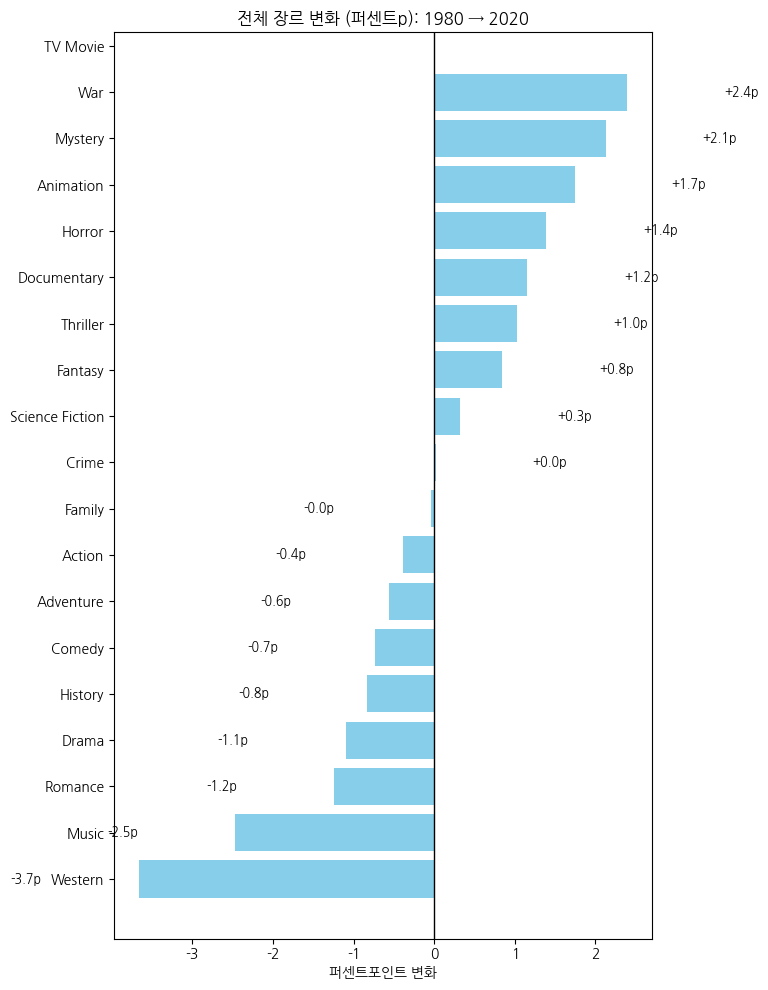

In [83]:

# 0) Ï§ÄÎπÑ: Ïó∞ÎèÑ/5ÎÖÑ Îã®ÏúÑ Í∑∏Î£πÌôî
df["release_year"] = pd.to_datetime(df["release_date"], errors="coerce").dt.year
df["year_bin"] = (df["release_year"] // 5) * 5

# 1980ÎÖÑ Ïù¥ÌõÑÎßå ÏÇ¨Ïö©
df = df[df["year_bin"] >= 1980].copy()

# 2025ÎÖÑ Ïù¥ÏÉÅÏùÄ Ï†ÑÎ∂Ä 2025 Íµ¨Í∞ÑÏúºÎ°ú Î¨∂Í∏∞
df.loc[df["release_year"] >= 2025, "year_bin"] = 2025

# 1) Ï†ÑÏ≤¥ Ïû•Î•¥Î≥Ñ 5ÎÖÑ Îã®ÏúÑ ÌèâÍ∑† y_result Í≥ÑÏÇ∞
trend_all = {}
for c in cols:   # cols = ['Action','Adventure',...,'Western']
    trend_all[c] = df.loc[df[c] == 1].groupby("year_bin")["y_result"].mean()

trend_all = pd.DataFrame(trend_all).sort_index()

# 2) 100% Ï†ïÍ∑úÌôî (Í∞Å Íµ¨Í∞ÑÎ≥Ñ Ìï© = 100%)
trend_all_pct = trend_all.div(trend_all.sum(axis=1), axis=0) * 100

# 3) Ï¥àÍ∏∞(1980) ‚Üî ÏµúÏã†(2025) Î≥ÄÌôî(ÌçºÏÑºÌä∏p) Í≥ÑÏÇ∞
first_bin = trend_all_pct.index.min()   # 1980
latest_bin = trend_all_pct.index.max()  # 2025
change_pp = (trend_all_pct.loc[latest_bin] - trend_all_pct.loc[first_bin]).sort_values()

# 4) ÏãúÍ∞ÅÌôî (ÏàòÌèâ ÎßâÎåÄÍ∑∏ÎûòÌîÑ)
plt.figure(figsize=(8,10))
plt.barh(change_pp.index, change_pp.values, color="skyblue")
plt.axvline(0, color="black", linewidth=1)
plt.title(f"Ï†ÑÏ≤¥ Ïû•Î•¥ Î≥ÄÌôî (ÌçºÏÑºÌä∏p): {first_bin} ‚Üí {latest_bin}")
plt.xlabel("ÌçºÏÑºÌä∏Ìè¨Ïù∏Ìä∏ Î≥ÄÌôî")

# ÎßâÎåÄ ÏòÜÏóê Î≥ÄÌôîÎüâ ÎùºÎ≤® ÌëúÏãú
for i, v in enumerate(change_pp.values):
    plt.text(v + (1.2 if v>=0 else -1.2), i, f"{v:+.1f}p",
             va='center', ha='left' if v>=0 else 'right', fontsize=9)

plt.tight_layout()
plt.show()


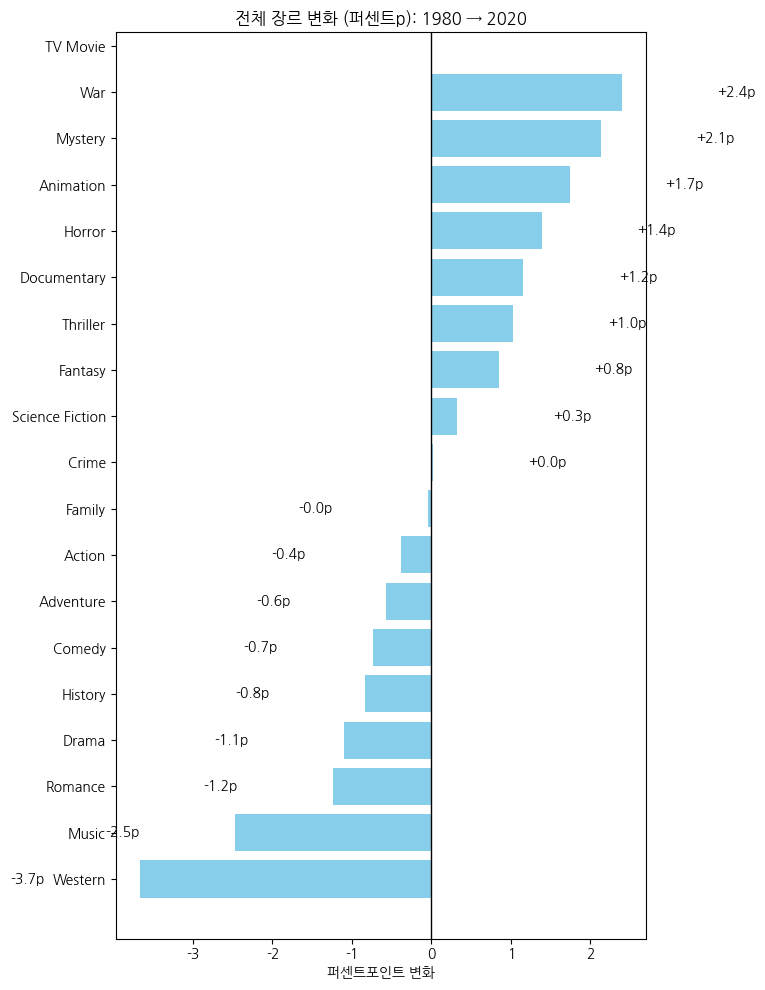

In [84]:
# 1) Ï†ÑÏ≤¥ Ïû•Î•¥Î≥Ñ 5ÎÖÑ Îã®ÏúÑ ÌèâÍ∑† y_result Í≥ÑÏÇ∞
trend_all = {}
for c in cols:   # cols = ['Action','Adventure',...,'Western'] Ïû•Î•¥ OHE ÏπºÎüº Î¶¨Ïä§Ìä∏
    trend_all[c] = df.loc[df[c]==1].groupby("year_bin")["y_result"].mean()

trend_all = pd.DataFrame(trend_all).sort_index()

# 2) 100% ÎπÑÏú®Î°ú Ï†ïÍ∑úÌôî
trend_all_pct = trend_all.div(trend_all.sum(axis=1), axis=0) * 100

# 3) Ï¥àÍ∏∞‚ÜîÏµúÏã† Î≥ÄÌôî(ÌçºÏÑºÌä∏p) Í≥ÑÏÇ∞
first_bin = trend_all_pct.index.min()
latest_bin = trend_all_pct.index.max()
change_pp_all = (trend_all_pct.loc[latest_bin] - trend_all_pct.loc[first_bin]).sort_values()

# 4) ÏãúÍ∞ÅÌôî (Ï†ÑÏ≤¥ Ïû•Î•¥ Î≥ÄÌôî)
plt.figure(figsize=(8,10))
plt.barh(change_pp_all.index, change_pp_all.values, color="skyblue")
plt.axvline(0, color="black", linewidth=1)
plt.title(f"Ï†ÑÏ≤¥ Ïû•Î•¥ Î≥ÄÌôî (ÌçºÏÑºÌä∏p): {first_bin} ‚Üí {latest_bin}")
plt.xlabel("ÌçºÏÑºÌä∏Ìè¨Ïù∏Ìä∏ Î≥ÄÌôî")

# ÎßâÎåÄ ÏòÜÏóê Í∞í ÎùºÎ≤® ÌëúÏãú
for i, v in enumerate(change_pp_all.values):
    plt.text(v + (1.2 if v>=0 else -1.2), i, f"{v:+.1f}p",
             va='center', ha='left' if v>=0 else 'right')

plt.tight_layout()
plt.show()


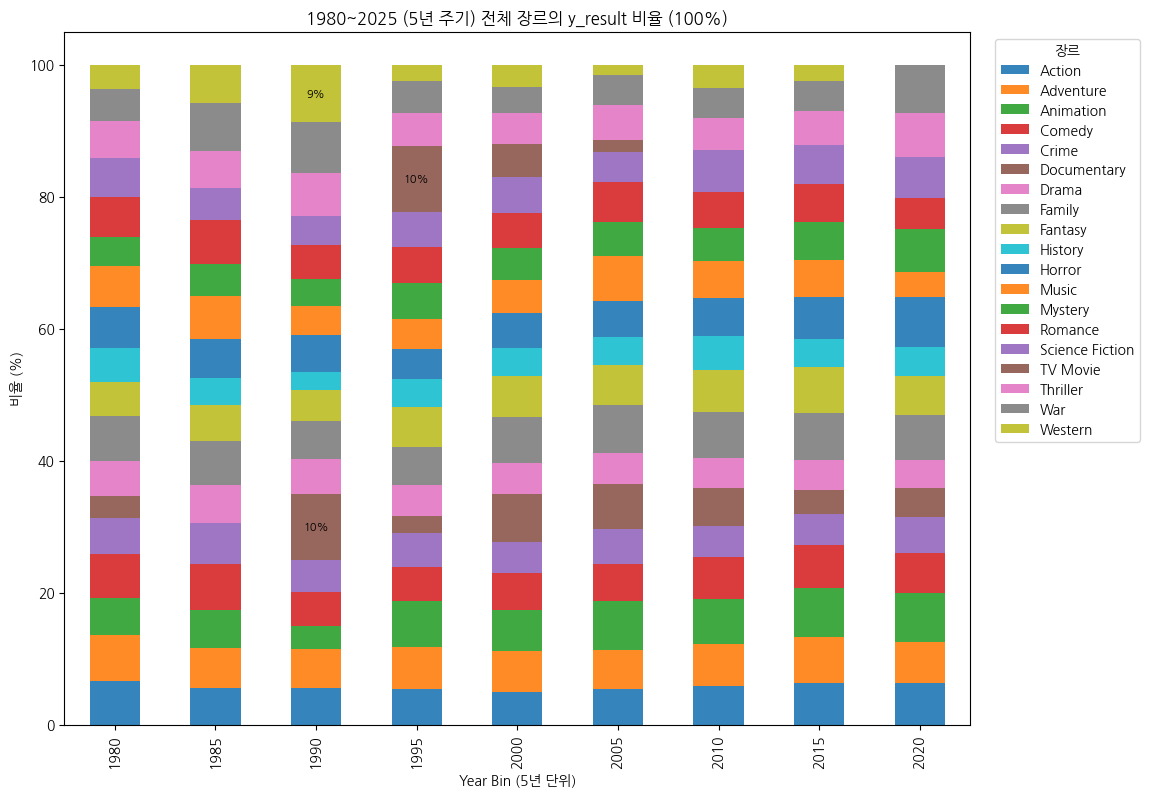

In [85]:
# 0) Ï§ÄÎπÑ: Ïó∞ÎèÑ/5ÎÖÑ Ï£ºÍ∏∞
df["release_year"] = pd.to_datetime(df["release_date"], errors="coerce").dt.year
df["year_bin"] = (df["release_year"] // 5) * 5
df = df[df["year_bin"] >= 1980].copy()
df.loc[df["release_year"] >= 2025, "year_bin"] = 2025  # 2025 Ìè¨Ìï®

# 1) Ï†ÑÏ≤¥ Ïû•Î•¥Î≥Ñ 5ÎÖÑ Ï£ºÍ∏∞ ÌèâÍ∑† y_result Í≥ÑÏÇ∞
trend_all = {}
for c in cols:   # cols = ['Action','Adventure',...,'Western'] Ïû•Î•¥ Î¶¨Ïä§Ìä∏
    trend_all[c] = df.loc[df[c]==1].groupby("year_bin")["y_result"].mean()

trend_all = pd.DataFrame(trend_all).sort_index()

# 2) 100% Ï†ïÍ∑úÌôî
trend_all_pct = trend_all.div(trend_all.sum(axis=1), axis=0) * 100

# 3) Ï¥àÍ∏∞‚ÜîÏµúÏã† Î≥ÄÌôî(ÌçºÏÑºÌä∏p) Í≥ÑÏÇ∞
first_bin = trend_all_pct.index.min()
latest_bin = trend_all_pct.index.max()
change_pp_all = (trend_all_pct.loc[latest_bin] - trend_all_pct.loc[first_bin]).sort_values()

# 4) ÏãúÍ∞ÅÌôî: ÏôºÏ™Ω = 100% ÎàÑÏ†Å ÎßâÎåÄ(Ï†ÑÏ≤¥ Ïû•Î•¥), Ïò§Î•∏Ï™Ω = Î≥ÄÌôî(ÌçºÏÑºÌä∏p)
fig = plt.figure(figsize=(18,9))
gs = fig.add_gridspec(1, 2, width_ratios=[2.5, 1])

# (a) 100% ÎàÑÏ†Å ÎßâÎåÄ
ax1 = fig.add_subplot(gs[0,0])
trend_all_pct.plot(kind="bar", stacked=True, ax=ax1, alpha=0.9)
ax1.set_title("1980~2025 (5ÎÖÑ Ï£ºÍ∏∞) Ï†ÑÏ≤¥ Ïû•Î•¥Ïùò y_result ÎπÑÏú® (100%)")
ax1.set_xlabel("Year Bin (5ÎÖÑ Îã®ÏúÑ)")
ax1.set_ylabel("ÎπÑÏú® (%)")
ax1.legend(title="Ïû•Î•¥", bbox_to_anchor=(1.02, 1), loc="upper left")

# ÎßâÎåÄ ÎùºÎ≤®(ÌçºÏÑºÌä∏ ÌëúÏãú, ÏûëÏùÄ Í∞í ÏÉùÎûµ)
for container in ax1.containers:
    labels = []
    for h in container:
        val = h.get_height()
        labels.append(f"{val:.0f}%" if val >= 8 else "")
    ax1.bar_label(container, labels=labels, label_type='center', fontsize=8)


